## ******* Find Outliers... ******

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
dataset = pd.read_csv("loan_sanction_test.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [174]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [175]:
dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [176]:
perc = dataset.isnull().sum()/dataset.shape[0] * 100
perc

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

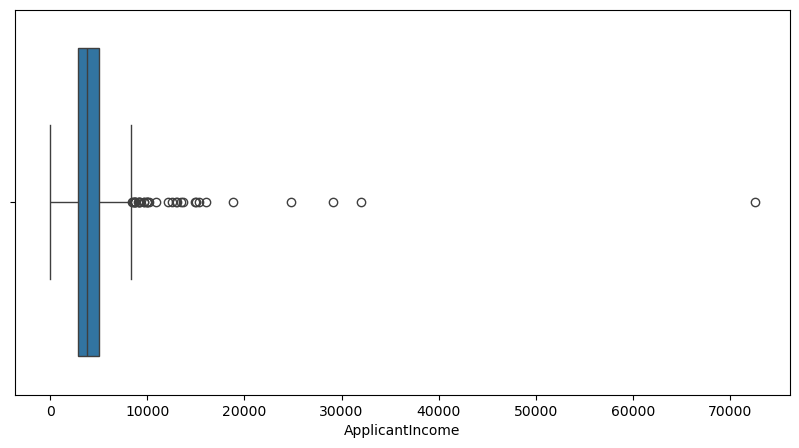

In [177]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "ApplicantIncome", data = dataset)
plt.show()

C:\Users\arman\AppData\Local\Temp\ipykernel_12560\4246328762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


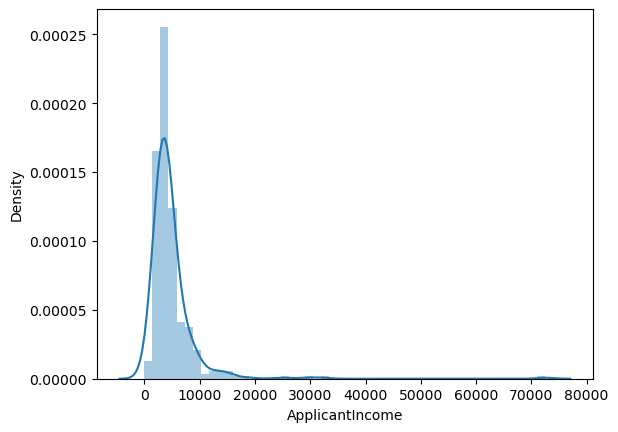

In [178]:
sns.distplot(dataset["ApplicantIncome"])
plt.show()

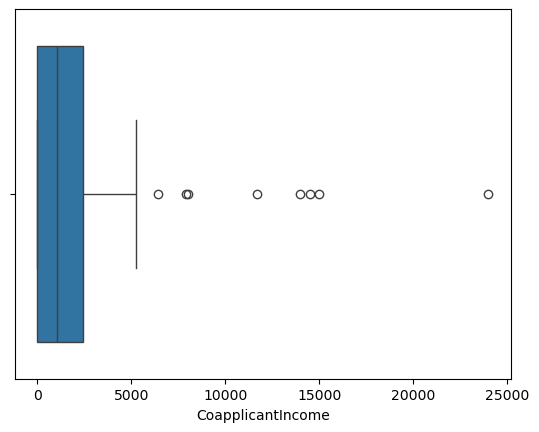

In [179]:
sns.boxplot(x = "CoapplicantIncome", data = dataset)
plt.show()

C:\Users\arman\AppData\Local\Temp\ipykernel_12560\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


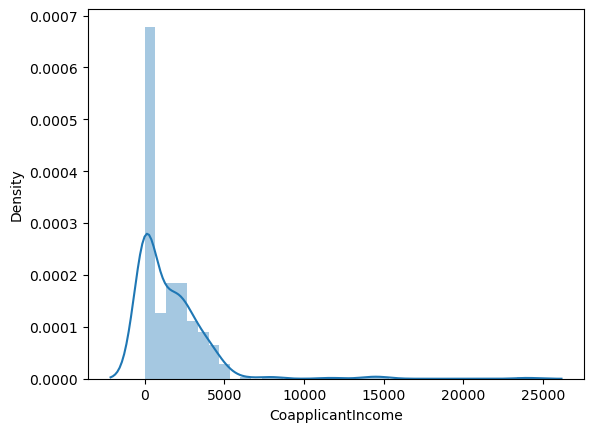

In [180]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

## **** Outlier Removal ( Using IQR ) ****

In [182]:
dataset.shape

(367, 12)

In [183]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

In [184]:
IQR = q3 - q1

In [185]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(-3645.75, 6076.25)

In [186]:
new_dataset = dataset[dataset["CoapplicantIncome"] <= max_range]
new_dataset.shape

(359, 12)

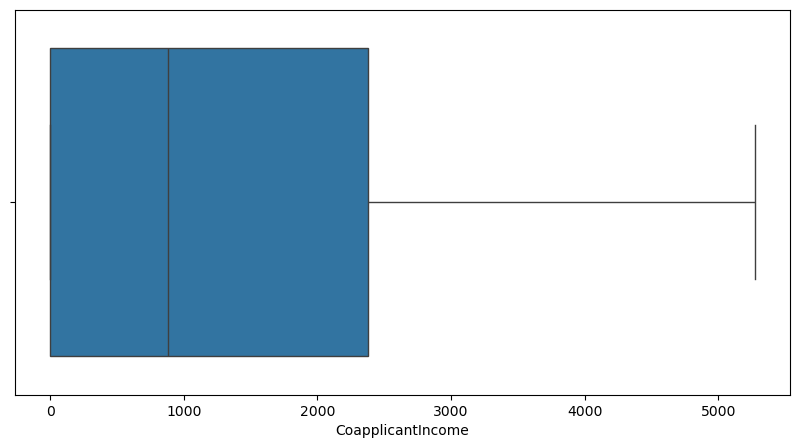

In [187]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome", data = new_dataset)
plt.show()

## **** Outlier Removal ( Using Z Score ) ****

## ---- 1. Direct Method ----

In [190]:
min_range1 = dataset["ApplicantIncome"].mean() - (3*dataset["ApplicantIncome"].std())
min_range1 = dataset["ApplicantIncome"].mean() + (3*dataset["ApplicantIncome"].std())

In [191]:
min_range1 , min_range1

(19537.655651982066, 19537.655651982066)

In [192]:
new_dataset1 = dataset[dataset["ApplicantIncome"] <= max_range]
new_dataset1.shape

(303, 12)

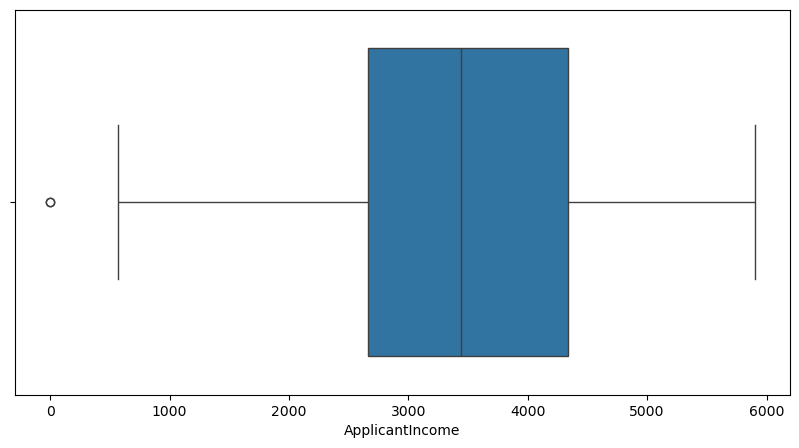

In [193]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "ApplicantIncome", data = new_dataset1)
plt.show()

## ---- 2. Z score Method ----

In [195]:
z_score = (dataset["ApplicantIncome"] - dataset["ApplicantIncome"].mean()) / (dataset["ApplicantIncome"].std())

In [196]:
z_score

0      0.186206
1     -0.352211
2      0.039587
3     -0.502089
4     -0.311484
         ...   
362   -0.162218
363   -0.131876
364   -0.316778
365    0.039587
366    0.894865
Name: ApplicantIncome, Length: 367, dtype: float64

In [197]:
dataset["z_score"] = z_score
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,z_score
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0.186206
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,-0.352211
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0.039587


In [198]:
dataset[dataset["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,z_score
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0.186206
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,-0.352211
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0.039587
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,-0.502089
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,-0.311484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,-0.162218
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,-0.131876
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,-0.316778
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0.039587
